In [4]:
import pandas as pd
import numpy as np
import os

In [17]:
df_train = pd.DataFrame(data={'filepath':[],'Label':[]})
df_test = pd.DataFrame(data={'filepath':[],'Label':[]})

In [18]:
filename=[]
label=[]

for i in os.listdir("/content/Face Mask Dataset/Train/WithMask"):
    filename.append(f"/content/Face Mask Dataset/Train/WithMask/{i}")
    label.append("1")

for i in os.listdir("/content/Face Mask Dataset/Train/WithoutMask"):
    filename.append(f"/content/Face Mask Dataset/Train/WithoutMask/{i}")
    label.append("0")

df_train['filepath']=filename
df_train['Label']=label

# df_train['Label']=df_train['Label'].astype(int)
df_train

,filepath,Label
0,/content/Face Mask Dataset/Train/WithMask/265.png,1
1,/content/Face Mask Dataset/Train/WithMask/1756...,1
2,/content/Face Mask Dataset/Train/WithMask/Augm...,1
3,/content/Face Mask Dataset/Train/WithMask/Augm...,1
4,/content/Face Mask Dataset/Train/WithMask/Augm...,1
...,...,...
9995,/content/Face Mask Dataset/Train/WithoutMask/5...,0
9996,/content/Face Mask Dataset/Train/WithoutMask/9...,0
9997,/content/Face Mask Dataset/Train/WithoutMask/3...,0
9998,/content/Face Mask Dataset/Train/WithoutMask/1...,0


In [19]:
filename=[]
label=[]

for i in os.listdir("/content/Face Mask Dataset/Validation/WithMask"):
    filename.append(f"/content/Face Mask Dataset/Validation/WithMask/{i}")
    label.append("1")

for i in os.listdir("/content/Face Mask Dataset/Validation/WithoutMask"):
    filename.append(f"/content/Face Mask Dataset/Validation/WithoutMask/{i}")
    label.append("0")

df_test['filepath']=filename
df_test['Label']=label
# df_test['Label']=df_test['Label'].astype(int)
df_test

,filepath,Label
0,/content/Face Mask Dataset/Validation/WithMask...,1
1,/content/Face Mask Dataset/Validation/WithMask...,1
2,/content/Face Mask Dataset/Validation/WithMask...,1
3,/content/Face Mask Dataset/Validation/WithMask...,1
4,/content/Face Mask Dataset/Validation/WithMask...,1
...,...,...
795,/content/Face Mask Dataset/Validation/WithoutM...,0
796,/content/Face Mask Dataset/Validation/WithoutM...,0
797,/content/Face Mask Dataset/Validation/WithoutM...,0
798,/content/Face Mask Dataset/Validation/WithoutM...,0


In [35]:
df_train

,filepath,Label
0,/content/Face Mask Dataset/Train/WithMask/265.png,1
1,/content/Face Mask Dataset/Train/WithMask/1756...,1
2,/content/Face Mask Dataset/Train/WithMask/Augm...,1
3,/content/Face Mask Dataset/Train/WithMask/Augm...,1
4,/content/Face Mask Dataset/Train/WithMask/Augm...,1
...,...,...
9995,/content/Face Mask Dataset/Train/WithoutMask/5...,0
9996,/content/Face Mask Dataset/Train/WithoutMask/9...,0
9997,/content/Face Mask Dataset/Train/WithoutMask/3...,0
9998,/content/Face Mask Dataset/Train/WithoutMask/1...,0


**Shuffle the Data**

In [38]:
df_train = df_train.sample(frac = 1)
df_test= df_test.sample(frac=1)

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping
from keras.applications import VGG16

In [43]:
# Create an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom in or out
    fill_mode='nearest'  # Fill mode for padding (e.g., 'nearest' for nearest neighbor)
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Create the train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath',
    y_col='Label',
    subset='training',
    batch_size=32,
    shuffle=True,
    target_size=(224, 224),
    class_mode='binary'
)

# Create the validation generator
validation_generator = valid_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='Label',
    subset=None,
    batch_size=32,
    shuffle=False,
    target_size=(224, 224),
    class_mode='binary'

)

Found 10000 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [44]:
model = Sequential()

# Convolutional block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

# Convolutional block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

# Convolutional block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 112, 112, 64)     

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [47]:
history = model.fit(train_generator,epochs=20,validation_data=validation_generator,callbacks=[early_stopping])

Epoch 1/20
313/313 [==============================] - 153s 480ms/step - loss: 2.1780 - accuracy: 0.8923 - val_loss: 1.9071 - val_accuracy: 0.8363
Epoch 2/20
313/313 [==============================] - 149s 475ms/step - loss: 0.2025 - accuracy: 0.9370 - val_loss: 0.4275 - val_accuracy: 0.9250
Epoch 3/20
313/313 [==============================] - 149s 474ms/step - loss: 0.1821 - accuracy: 0.9364 - val_loss: 0.7340 - val_accuracy: 0.9413
Epoch 4/20
313/313 [==============================] - 148s 474ms/step - loss: 0.1859 - accuracy: 0.9390 - val_loss: 0.3438 - val_accuracy: 0.9475
Epoch 5/20
313/313 [==============================] - 150s 479ms/step - loss: 0.1809 - accuracy: 0.9417 - val_loss: 0.1497 - val_accuracy: 0.9650
Epoch 6/20
313/313 [==============================] - 151s 480ms/step - loss: 0.1936 - accuracy: 0.9361 - val_loss: 0.1324 - val_accuracy: 0.9588
Epoch 7/20
313/313 [==============================] - 149s 477ms/step - loss: 0.2097 - accuracy: 0.9329 - val_loss: 0.1135 -

In [48]:
model.save('maskdetection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


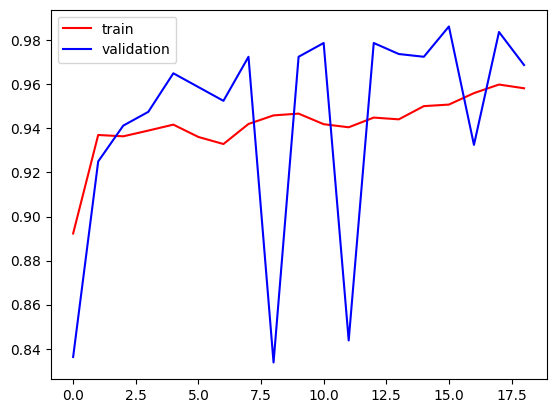

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color= 'red' , label= 'train' )
plt.plot(history.history['val_accuracy'] , color= 'blue' , label= 'validation' )
plt.legend()
plt.show()

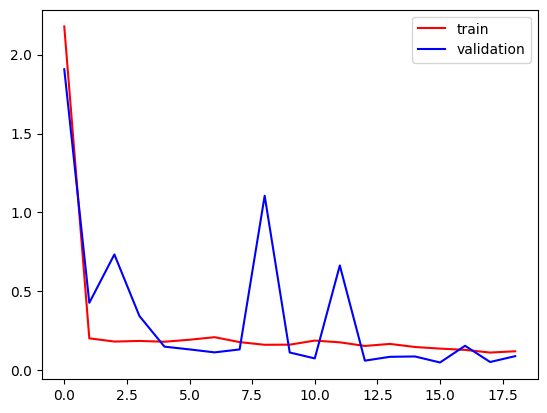

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color= 'red' , label= 'train' )
plt.plot(history.history['val_loss'] , color= 'blue' , label= 'validation' )
plt.legend()
plt.show()